In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
training_data = pd.read_csv("./train.csv")

In [3]:
training_data.dropna(inplace=True)

In [4]:
A0 = training_data.to_numpy().T

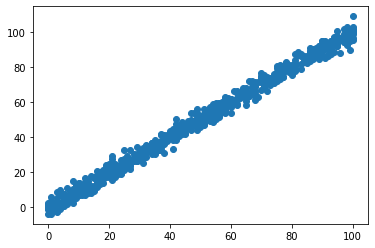

In [5]:
plt.scatter(A0[0], A0[1])

The data is highly correlated. We hope to see a straight line almost fitting the data

In [6]:
A = A0 - A0.mean(axis=1, keepdims=True)

In [7]:
covariance_matrix = A @ A.T / (A.shape[1])

In [8]:
u, sigma, vt = np.linalg.svd(covariance_matrix)

Since covariance matrix is positive definite($AA^T$ and $A^TA$ are), diagonalization and svd yield same results.
The leading singular vector $u_1$ gives the prediction line. The second singular vector $u_2$ is perpendicular to $u_1$. Its corresponding singular value $\sigma_2$ gives the measure of spread from the prediction line. If the line fits the data perfectly, $\sigma_2 = 0$!


In [10]:
dominant_vector = u[:,0]

In [14]:
slope = dominant_vector[1]/dominant_vector[0]

In [15]:
def prediction_line(x):
    return x * slope

In [23]:
xs = np.arange(-50, 50, 1)
ys = prediction_line(xs)

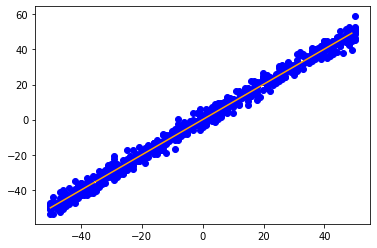

In [25]:
plt.plot(xs, ys, color='orange')
plt.scatter(A[0], A[1], color='blue')

__Perfect!__ PCA gives a best fit line where the error is perpendicular distance from point to fit line, unlike least squares where the error is vertical error. See my notes on linear algebra lecture 7 for proof.